In [1]:
from vnstock3 import * 
from vnstock3 import Vnstock
from vnstock3 import Vnstock
stock = Vnstock().stock(symbol='ACB', source='VCI')
pan_stock = Vnstock().stock(symbol='PAN', source='VCI')

Phiên bản Vnstock 0.3.0.8 đã có mặt, vui lòng cập nhật với câu lệnh : `pip install vnstock3 --upgrade`.
Lịch sử phiên bản: https://vnstocks.com/docs/tai-lieu/lich-su-phien-ban
Phiên bản hiện tại 0.3.0.7

2024-10-16 11:05:59,870 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-10-16 11:05:59,871 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


LẤY GIÁ DỮ LIỆU REALTIME

In [3]:
import pandas as pd
from datetime import datetime

# Danh sách các mã cổ phiếu
symbols = ['MBB', 'BID', 'VCB', 'VHM', 'AMV', 'BVB', 'PAN', 'TNG', 'SSI', 'POW', 'NT2', 'VLB', 'TVN', 'DBC', 'MML', 'GVR', 'VCG', 'HAN', 'BAF', 'ADS', 'YEG']

# Tạo danh sách để lưu trữ dữ liệu
data = []

for symbol in symbols:
    df = stock.quote.intraday(symbol=symbol, show_log=False)
    # Chuyển đổi cột 'time' thành kiểu datetime
    df['time'] = pd.to_datetime(df['time'])
    # Sắp xếp DataFrame theo cột 'time' giảm dần (thời gian mới nhất lên đầu tiên)
    df_sorted = df.sort_values(by='time', ascending=False)
    # Lấy dòng đầu tiên (thời gian gần nhất)
    latest_time = df_sorted.iloc[0]['time']
    latest_price = df_sorted.iloc[0]['price']
    # Thêm dữ liệu vào danh sách
    data.append([symbol, latest_time, latest_price])

# Tạo DataFrame từ danh sách dữ liệu
intra_data = pd.DataFrame(data, columns=['Mã cổ phiếu', 'Time', 'Price'])

# Đảm bảo cột 'Time' là kiểu datetime
intra_data['Time'] = pd.to_datetime(intra_data['Time'])

# Tạo thêm cột 'Date' từ cột 'Time'
intra_data['Date'] = intra_data['Time'].dt.date

# Hiển thị DataFrame kết quả
print(intra_data)

   Mã cổ phiếu                Time    Price        Date
0          MBB 2024-10-16 11:23:56  25600.0  2024-10-16
1          BID 2024-10-16 11:24:25  50000.0  2024-10-16
2          VCB 2024-10-16 11:24:05  91500.0  2024-10-16
3          VHM 2024-10-16 11:24:27  44650.0  2024-10-16
4          AMV 2024-10-16 11:23:11   2200.0  2024-10-16
5          BVB 2024-10-16 11:23:25  11700.0  2024-10-16
6          PAN 2024-10-16 11:24:05  24800.0  2024-10-16
7          TNG 2024-10-16 11:19:50  24000.0  2024-10-16
8          SSI 2024-10-16 11:24:30  27400.0  2024-10-16
9          POW 2024-10-16 11:22:32  12650.0  2024-10-16
10         NT2 2024-10-16 11:22:18  19600.0  2024-10-16
11         VLB 2024-10-16 10:24:50  40500.0  2024-10-16
12         TVN 2024-10-16 11:22:11   8100.0  2024-10-16
13         DBC 2024-10-16 11:24:18  30100.0  2024-10-16
14         MML 2024-10-16 11:10:08  25000.0  2024-10-16
15         GVR 2024-10-16 11:23:35  35900.0  2024-10-16
16         VCG 2024-10-16 11:20:19  18350.0  202

DÁNH SÁCH MUA VÀO CÁC CỔ PHIẾU T+

In [4]:
from datetime import datetime

# Danh sách các mã chứng khoán đã chọn
stock_symbols = ["DBC", "AMV", "BVB", "TNG", "PAN", "VLB", "MML", "ADS",'YEG']

# Giá hiện tại của các mã chứng khoán
current_prices = {
    "DBC": 35000,
    "AMV": 3400,
    "BVB": 11800,
    "TNG": 24000,
    "PAN": 24800,
    "VLB": 35000,
    "MML": 28000,
    "ADS": 13300,
    "YEG": 9200,
    "AGM": 4200
}

# Ngày giao dịch gần nhất
current_date = datetime.now().strftime('%Y-%m-%d')

# Tạo DataFrame với tất cả các cột
data = {
    "Ngày mua": [current_date] * len(stock_symbols),
    "Mã cổ phiếu": stock_symbols,
    "Loại GD": ["BUY"] * len(stock_symbols),
    "KLGD": [1000] * len(stock_symbols),
    "Giá mua": [current_prices[symbol] for symbol in stock_symbols],
    "Giá trị GD": [current_prices[symbol] * 1000 for symbol in stock_symbols]
}
STTrades = pd.DataFrame(data)

# Thêm các cột mới
for symbol in STTrades['Mã cổ phiếu']:
    symbol_data = intra_data[intra_data['Mã cổ phiếu'] == symbol]
    if not symbol_data.empty:
        STTrades.loc[STTrades['Mã cổ phiếu'] == symbol, 'Current_price'] = symbol_data['Price'].iloc[-1].astype(int)
        STTrades.loc[STTrades['Mã cổ phiếu'] == symbol, 'Current_Date'] = symbol_data['Date'].iloc[-1]
    else:
        STTrades.loc[STTrades['Mã cổ phiếu'] == symbol, 'Current_price'] = None
        STTrades.loc[STTrades['Mã cổ phiếu'] == symbol, 'Current_Date'] = None

STTrades['Current_price'] = STTrades['Current_price'].astype('Int64')  # Chuyển đổi sang kiểu dữ liệu Int64 để hỗ trợ giá trị None
STTrades['Current value'] = (STTrades['Current_price'] * STTrades['KLGD']).astype('Int64')
STTrades['P&L'] = (STTrades['Current value'] - STTrades['Giá trị GD']).astype('Int64')

# Tính tổng giá trị giao dịch
total_value = STTrades['Giá trị GD'].sum()

# Tính tổng giá trị hiện tại
total_current_value = STTrades['Current value'].sum()

# Tính tổng P&L
total_PnL = STTrades['P&L'].sum()

# Chuyển đổi sang đơn vị triệu VND
total_value_million = total_value / 1_000_000
total_current_value_million = total_current_value / 1_000_000
total_PnL_million = total_PnL / 1_000_000
# Hiển thị DataFrame và tổng giá trị giao dịch
from tabulate import tabulate

print(tabulate(STTrades, headers='keys', tablefmt='grid', showindex=False))
print(f"\nTổng giá trị giao dịch: {total_value_million:.2f} triệu VND")
print(f"Tổng giá trị hiện tại: {total_current_value_million:.2f} triệu VND")
print(f"Tổng P&L: {total_PnL_million:.2f} triệu VND")

+------------+---------------+-----------+--------+-----------+--------------+-----------------+----------------+-----------------+----------+
| Ngày mua   | Mã cổ phiếu   | Loại GD   |   KLGD |   Giá mua |   Giá trị GD |   Current_price | Current_Date   |   Current value |      P&L |
+============+===============+===========+========+===========+==============+=================+================+=================+==========+
| 2024-10-16 | DBC           | BUY       |   1000 |     35000 |     35000000 |           30100 | 2024-10-16     |        30100000 | -4900000 |
+------------+---------------+-----------+--------+-----------+--------------+-----------------+----------------+-----------------+----------+
| 2024-10-16 | AMV           | BUY       |   1000 |      3400 |      3400000 |            2200 | 2024-10-16     |         2200000 | -1200000 |
+------------+---------------+-----------+--------+-----------+--------------+-----------------+----------------+-----------------+----------+

CỔ PHIẾU ĐẦU TƯ

In [5]:
import pandas as pd
from datetime import datetime

# Danh sách các mã cổ phiếu đã chọn
stock_symbols = ['VCB', 'VCG', 'BID', 'GVR', 'VHM', 'POW', 'NT2', 'HAN', 'BAF', 'SSI', 'MBB']

# Giá hiện tại của các mã cổ phiếu
current_prices = {
    "VCB": 88000,
    "VCG": 18600,
    "BID": 44000,
    "GVR": 35000,
    "VHM": 38000,
    "POW": 14000,
    "NT2": 22000,
    "HAN": 11000,
    "BAF": 19600,
    "SSI": 34000,
    "MBB": 22800
}

# Ngày giao dịch gần nhất
current_date = datetime.now().strftime('%Y-%m-%d')

# Tạo DataFrame với tất cả các cột
data = {
    "Ngày mua": [current_date] * len(stock_symbols),
    "Mã cổ phiếu": stock_symbols,
    "Loại GD": ["BUY"] * len(stock_symbols),
    "KLGD": [1000] * len(stock_symbols),
    "Giá mua": [current_prices[symbol] for symbol in stock_symbols],
    "Giá trị GD": [current_prices[symbol] * 1000 for symbol in stock_symbols]
}
LTTrades = pd.DataFrame(data)

# Thêm các cột mới
for symbol in LTTrades['Mã cổ phiếu']:
    symbol_data = intra_data[intra_data['Mã cổ phiếu'] == symbol]
    if not symbol_data.empty:
        LTTrades.loc[LTTrades['Mã cổ phiếu'] == symbol, 'Current_price'] = symbol_data['Price'].iloc[-1].astype(int)
        LTTrades.loc[LTTrades['Mã cổ phiếu'] == symbol, 'Current_Date'] = symbol_data['Date'].iloc[-1]
    else:
        LTTrades.loc[LTTrades['Mã cổ phiếu'] == symbol, 'Current_price'] = None
        LTTrades.loc[LTTrades['Mã cổ phiếu'] == symbol, 'Current_Date'] = None

LTTrades['Current_price'] = LTTrades['Current_price'].astype('Int64')  # Chuyển đổi sang kiểu dữ liệu Int64 để hỗ trợ giá trị None
LTTrades['Current value'] = (LTTrades['Current_price'] * LTTrades['KLGD']).astype('Int64')
# LTTrades['P&L'] = (LTTrades['Current value'] - LTTrades['Giá trị GD']).astype('Int64')

# Tính tổng giá trị giao dịch
total_value = LTTrades['Giá trị GD'].sum()

# Chuyển đổi sang đơn vị triệu VND
total_value_million = total_value / 1_000_000

# Hiển thị DataFrame và tổng giá trị giao dịch
print(LTTrades)
print(f"\nTổng giá trị giao dịch: {total_value_million:.2f} triệu VND")



      Ngày mua Mã cổ phiếu Loại GD  KLGD  Giá mua  Giá trị GD  Current_price  \
0   2024-09-22         VCB     BUY  1000    88000    88000000          90600   
1   2024-09-22         VCG     BUY  1000    18600    18600000          18650   
2   2024-09-22         BID     BUY  1000    44000    44000000          49050   
3   2024-09-22         GVR     BUY  1000    35000    35000000          35600   
4   2024-09-22         VHM     BUY  1000    38000    38000000          43750   
5   2024-09-22         POW     BUY  1000    14000    14000000          12550   
6   2024-09-22         NT2     BUY  1000    22000    22000000          19950   
7   2024-09-22         HAN     BUY  1000    11000    11000000          11100   
8   2024-09-22         BAF     BUY  1000    19600    19600000          20800   
9   2024-09-22         SSI     BUY  1000    34000    34000000          33600   
10  2024-09-22         MBB     BUY  1000    22800    22800000          24750   

   Current_Date  Current value  
0    2

BIỂU BỒ GIÁ THEO KHỐI LƯỢNG TRONG NGÀY

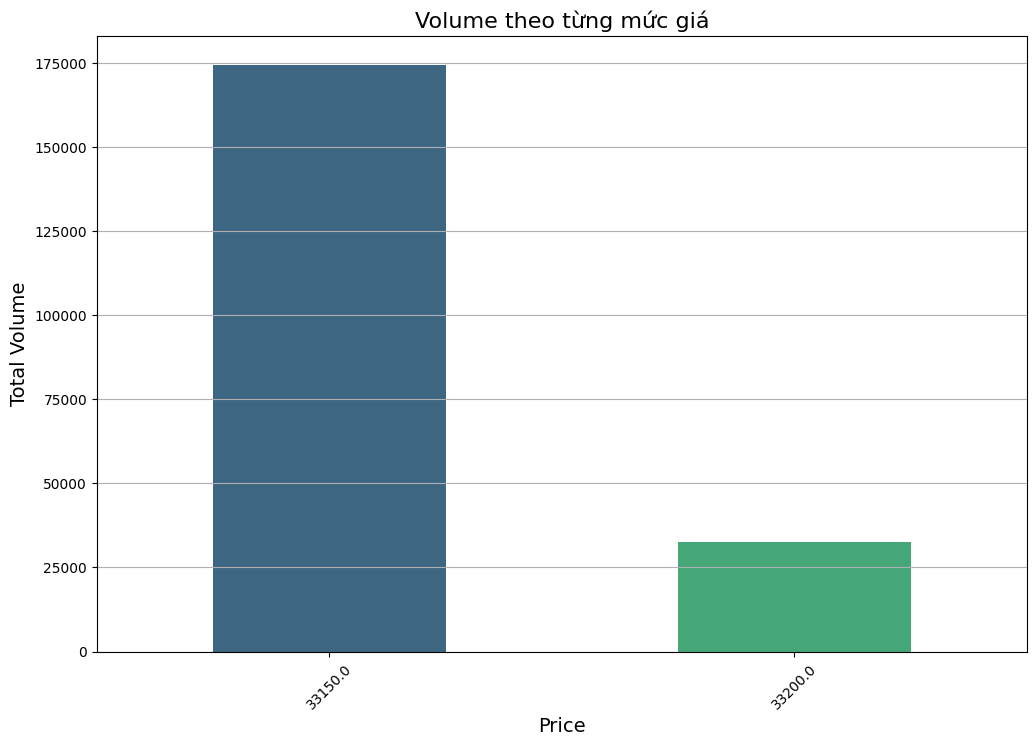

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử df là DataFrame chứa dữ liệu intraday của cổ phiếu
df = stock.quote.intraday(symbol='SSI', show_log=False)

# Nhóm dữ liệu theo cột 'price' và tính tổng volume cho từng nhóm
volume_by_price = df.groupby('price')['volume'].sum().reset_index()

# Đổi tên các cột cho rõ ràng
volume_by_price.columns = ['Price', 'Total Volume']

# Tạo cột 'total_value' bằng cách nhân 'Price' với 'Total Volume'
volume_by_price['total_value'] = volume_by_price['Price'] * volume_by_price['Total Volume']

# Vẽ biểu đồ cột sử dụng Seaborn với độ rộng cột được điều chỉnh
plt.figure(figsize=(12, 8))
sns.barplot(x='Price', y='Total Volume', data=volume_by_price, palette='viridis', width=0.5)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Total Volume', fontsize=14)
plt.title('Volume theo từng mức giá', fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Hiển thị biểu đồ
plt.show()


In [7]:
import pandas as pd
from datetime import datetime

# Danh sách các mã cổ phiếu
symbols = ['MBB', 'BID', 'VCB', 'VHM', 'AMV', 'BVB', 'PAN', 'TNG', 'SSI', 'POW', 'NT2', 'VLB', 'TVN', 'DBC', 'MML', 'GVR', 'VCG', 'HAN', 'BAF', 'ADS', 'YEG']

# Tạo danh sách để lưu trữ dữ liệu
data = []

for symbol in symbols:
    df = stock.quote.intraday(symbol=symbol, show_log=False)
    # Chuyển đổi cột 'time' thành kiểu datetime
    df['time'] = pd.to_datetime(df['time'])
    # Sắp xếp DataFrame theo cột 'time' giảm dần (thời gian mới nhất lên đầu tiên)
    df_sorted = df.sort_values(by='time', ascending=False)
    # Lấy dòng đầu tiên (thời gian gần nhất)
    latest_time = df_sorted.iloc[0]['time']
    latest_price = df_sorted.iloc[0]['price']
    # Thêm dữ liệu vào danh sách
    data.append([symbol, latest_time, latest_price])

# Tạo DataFrame từ danh sách dữ liệu
result_df = pd.DataFrame(data, columns=['Stock Symbol', 'Time', 'Price'])

# Đảm bảo cột 'Time' là kiểu datetime
result_df['Time'] = pd.to_datetime(result_df['Time'])

# Tạo thêm cột 'Date' từ cột 'Time'
result_df['Date'] = result_df['Time'].dt.date

# Đổi chỗ cột 'Time' và 'Mã cổ phiếu'
result_df = result_df[['Time', 'Stock Symbol', 'Price', 'Date']]

# Hiển thị DataFrame kết quả
print(result_df)

                  Time Stock Symbol    Price        Date
0  2024-09-04 09:26:15          MBB  24450.0  2024-09-04
1  2024-09-04 09:26:13          BID  48750.0  2024-09-04
2  2024-09-04 09:25:57          VCB  90900.0  2024-09-04
3  2024-09-04 09:26:00          VHM  41150.0  2024-09-04
4  2024-09-04 09:24:24          AMV   3000.0  2024-09-04
5  2024-09-04 09:25:49          BVB  11400.0  2024-09-04
6  2024-09-04 09:23:58          PAN  22600.0  2024-09-04
7  2024-09-04 09:26:23          TNG  26700.0  2024-09-04
8  2024-09-04 09:26:11          SSI  33200.0  2024-09-04
9  2024-09-04 09:26:20          POW  13250.0  2024-09-04
10 2024-09-04 09:25:37          NT2  19550.0  2024-09-04
11 2024-09-04 09:20:03          VLB  36000.0  2024-09-04
12 2024-09-04 09:26:11          TVN   9400.0  2024-09-04
13 2024-09-04 09:26:18          DBC  27850.0  2024-09-04
14 2024-09-04 09:10:41          MML  25600.0  2024-09-04
15 2024-09-04 09:26:06          GVR  34600.0  2024-09-04
16 2024-09-04 09:26:12         

In [7]:
def get_stock_info_for_symbols(symbols):
    stock_info = {}
    
    for symbol in symbols:
        # Fetch and sort the intraday stock data
        price_df_sorted = stock.quote.intraday(symbol=symbol, show_log=False).sort_values(by='time', ascending=False)
        
        # Extracting the date from the 'time' column
        trading_date = price_df_sorted.iloc[0]['time'].strftime('%Y-%m-%d')
        
        # Extracting the price from the first row
        price = price_df_sorted.iloc[0]['price']
        
        # Storing the extracted information in the dictionary
        stock_info[symbol] = (symbol, trading_date, price)
    
    return stock_info

# Example usage:
symbols = ['vcg', 'mbb', 'yeg','bid','vcb']
stocks_info = get_stock_info_for_symbols(symbols)
for symbol, info in stocks_info.items():
    print(f"Symbol: {info[0]}, Trading Date: {info[1]}, Price: {info[2]}")





Symbol: vcg, Trading Date: 2024-07-31, Price: 18250.0
Symbol: mbb, Trading Date: 2024-07-31, Price: 24750.0
Symbol: yeg, Trading Date: 2024-07-31, Price: 9630.0
Symbol: bid, Trading Date: 2024-07-31, Price: 48350.0
Symbol: vcb, Trading Date: 2024-07-31, Price: 88400.0


In [12]:

# price_df = stock.quote.intraday(symbol='PAN', show_log=False)
stock = Vnstock().stock(symbol='yeg', source='VCI')
df = stock.finance.balance_sheet(symbol = 'PAN' ,period='quaterly', lang='vi')
df.columns





2024-07-31 14:37:04,469 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


Index(['CP', 'Năm', 'Kỳ', 'Hàng tồn kho ròng', 'Tài sản lưu động khác',
       'Giá trị ròng tài sản đầu tư', 'Tài sản dài hạn khác', 'Các quỹ khác',
       'Các quỹ khác', 'Vốn Ngân sách nhà nước và quỹ khác',
       'Vốn Ngân sách nhà nước và quỹ khác', 'LỢI ÍCH CỦA CỔ ĐÔNG THIỂU SỐ',
       'Lợi thế thương mại', 'Tiền gửi tại ngân hàng nhà nước Việt Nam',
       'Tiền gửi tại các TCTD khác và cho vay các TCTD khác',
       'Dự phòng giảm giá chứng khoán kinh doanh',
       'Các công cụ tài chính phái sinh và khoản nợ tài chính khác',
       'Các công cụ tài chính phái sinh và khoản nợ tài chính khác',
       'Cho vay khách hàng', 'Cho vay khách hàng',
       'Dự phòng rủi ro cho vay khách hàng',
       'Chứng khoán đầu tư sẵn sàng để bán',
       'Chứng khoán đầu tư giữ đến ngày đáo hạn',
       'Dự phòng giảm giá chứng khoán đầu tư', 'Đầu tư vào công ty con',
       'Đầu tư vào công ty liên doanh', 'Dự phòng giảm giá đầu tư dài hạn',
       'Tài sản cố định hữu hình', 'Tài sản cố đ

information_table

DÙNG DEEP LEARNING ĐỂ DỰ ĐOÁN GIÁ CHỨNG KHOÁN 